In [1]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# Change color of Matplotlib font
import matplotlib as mpl

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [3]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [4]:
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load data set into Pandas dataframe
churn_df = pd.read_csv('churn_clean.csv', index_col=0)

In [7]:
# Examine the features of the dataset
churn_df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
# Get an idea of dataset size
churn_df.shape

(10000, 49)

In [9]:
# Examine first few records of dataset
churn_df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [10]:
# View DataFrame info
churn_df.info

<bound method DataFrame.info of           Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...               ...                                   ...   
9996          M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9997          D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9998          I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9999          I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
10000          T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                        UID          City State  \
CaseOrder                                                         
1          e88

In [11]:
# Provide an initial look at extant dataset
churn_df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [12]:
# Get an overview of descriptive statistics
churn_df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [13]:
# Print a matrix of Pearson correlation values
churn_df.corr()

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Zip,1.000000e+00,-0.042580,-0.901786,0.045138,-0.017205,-0.008135,0.002947,-0.011520,-0.007860,-0.004720,...,-0.008717,-0.002527,-0.026024,-0.003215,-0.019687,6.196497e-07,0.002923,0.007375,-0.005537,-0.002577
Lat,-4.257985e-02,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.004827,-0.030042,-0.002213,...,0.001406,-0.016949,0.005793,0.005380,-0.003421,1.101487e-02,-0.000464,-0.008726,0.006087,-0.019583
Lng,-9.017856e-01,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,0.005646,0.007872,0.008118,...,0.011765,0.003446,0.024389,0.003024,0.014966,-2.397805e-03,0.001366,-0.008770,0.001601,0.001912
Population,4.513808e-02,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,0.004019,...,-0.004778,-0.003902,0.000618,-0.002571,0.001620,-8.272481e-03,0.006970,0.000834,-0.013062,0.008524
Children,-1.720505e-02,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,...,-0.009781,0.025585,0.011470,0.013146,0.003394,-1.676831e-02,-0.000240,-0.000547,0.000687,-0.005236
Age,-8.135285e-03,-0.002943,0.012117,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,...,0.010729,-0.014724,-0.005972,0.006659,-0.003778,1.223656e-02,-0.008305,0.010635,0.005353,0.015193
Income,2.946523e-03,0.006563,-0.002997,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,...,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-2.274962e-02,0.011111,0.001768,0.016599,0.000740
Outage_sec_perweek,-1.152040e-02,0.004827,0.005646,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,...,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-5.992006e-03,-0.004156,-0.014752,-0.020854,0.008126
Email,-7.860018e-03,-0.030042,0.007872,0.017962,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,...,0.001997,-0.014579,0.003709,0.001156,0.012928,9.150354e-04,-0.007929,0.014468,0.010010,-0.005857
Contacts,-4.719513e-03,-0.002213,0.008118,0.004019,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,...,0.004259,0.003299,-0.007364,-0.003003,-0.021924,1.070637e-03,0.004698,-0.000994,0.004579,-0.012615


In [14]:
# Get data types of features
churn_df.dtypes

Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBa

In [15]:
# Rename last 8 survey columns for better description of variables
churn_df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'Fixes', 
                     'Item3':'Replacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'Respectfulness', 
                     'Item7':'Courteous', 
                     'Item8':'Listening'}, 
          inplace=True)

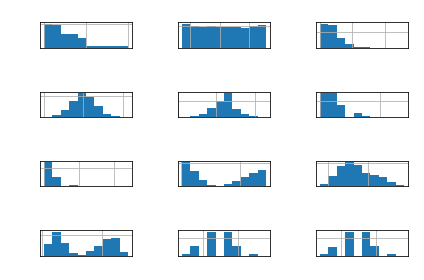

In [16]:
# Create histograms of contiuous variables & categorical variables
churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 
          'Bandwidth_GB_Year', 'TimelyResponse', 'Courteous']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

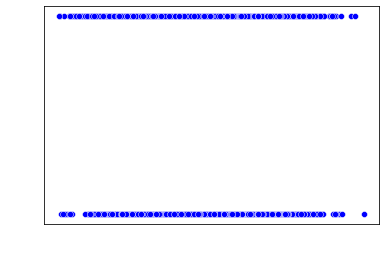

In [17]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['Churn'], color='blue')
plt.show();

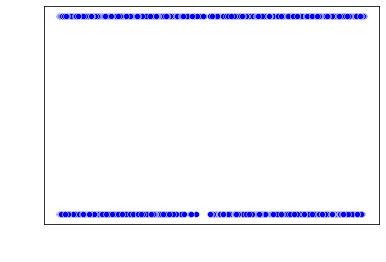

In [18]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Churn'], color='blue')
plt.show();

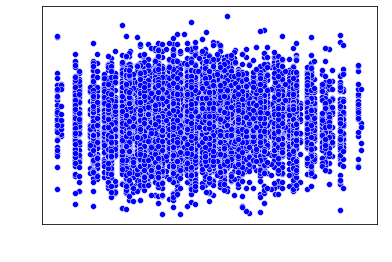

In [19]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Outage_sec_perweek'], color='blue')
plt.show();

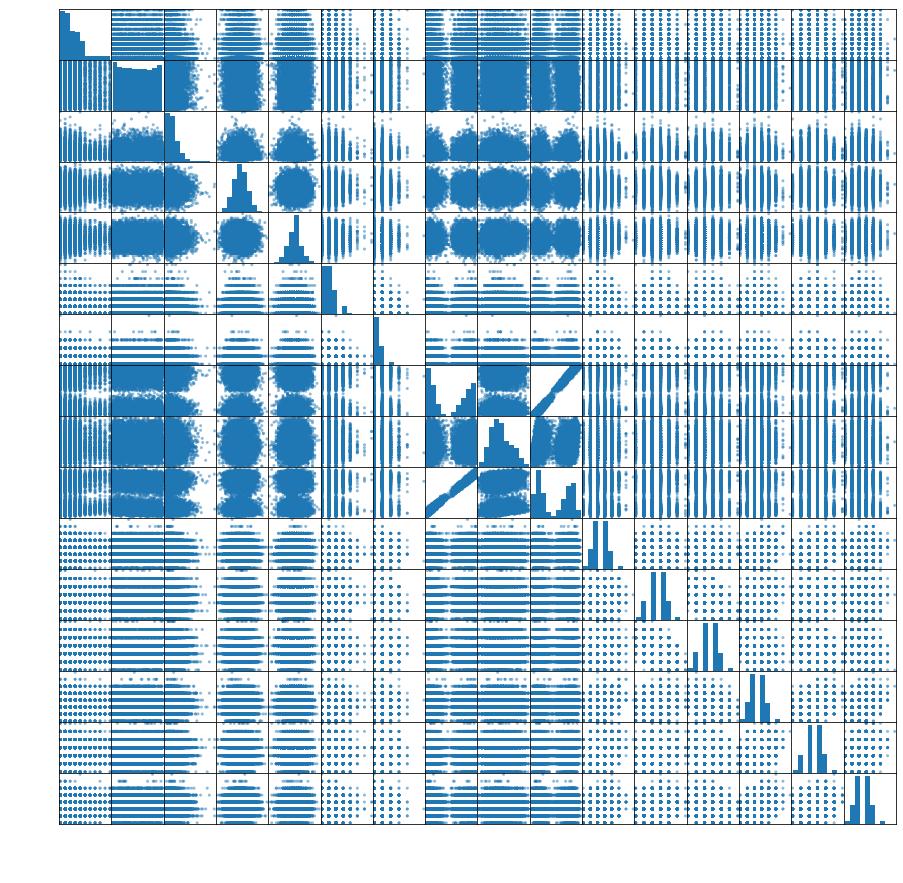

In [20]:
# Provide a scatter matrix of numeric variables for high level overview of potential relationships & distributions
churn_numeric = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 
                          'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 
                          'MonthlyCharge', 'Bandwidth_GB_Year', 'Replacements', 
                          'Reliability', 'Options', 'Respectfulness', 'Courteous', 
                          'Listening']]

pd.plotting.scatter_matrix(churn_numeric, figsize = [15, 15]);

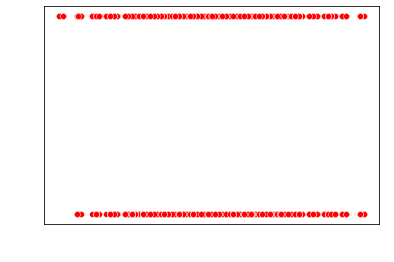

In [21]:
# Create individual scatterplot for viewing relationship of key financial featurte against target variable
sns.scatterplot(x = churn_df['MonthlyCharge'], y = churn_df['Churn'], color='red')
plt.show();

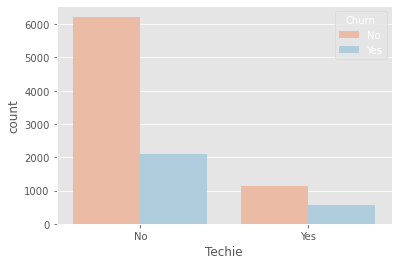

In [22]:
# Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')

# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='Techie', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

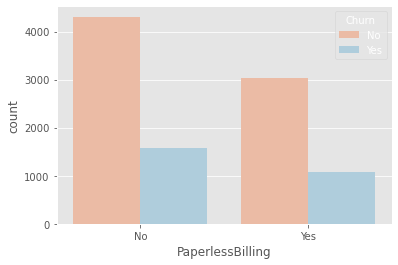

In [23]:
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

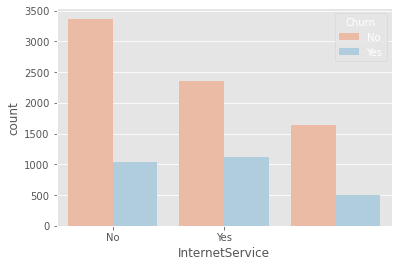

In [24]:
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='InternetService', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

<AxesSubplot:>

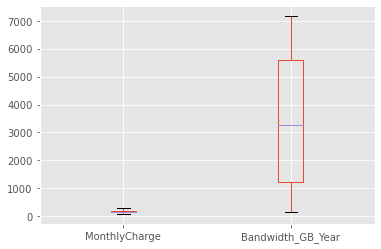

In [25]:
# Create multiple boxplots for continuous & categorical variables
churn_df.boxplot(column=['MonthlyCharge','Bandwidth_GB_Year'])

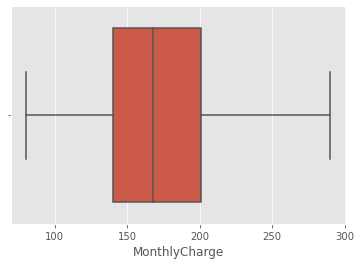

In [26]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('MonthlyCharge', data = churn_df)
plt.show()

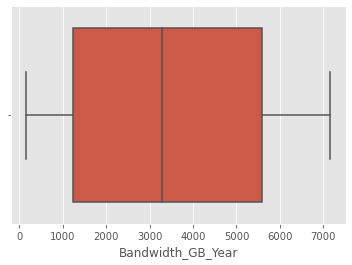

In [27]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('Bandwidth_GB_Year', data = churn_df)
plt.show()

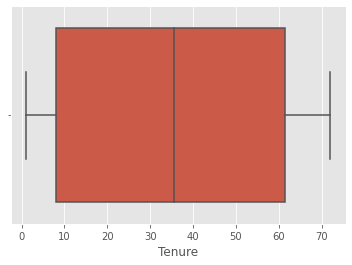

In [28]:
# Create Seaborn boxplots for continuous variables
sns.boxplot('Tenure', data = churn_df)
plt.show()

In [29]:
# Discover missing data points within dataset
data_nulls = churn_df.isnull().sum()
print(data_nulls)

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

'(GeeksForGeeks, p. 1)'

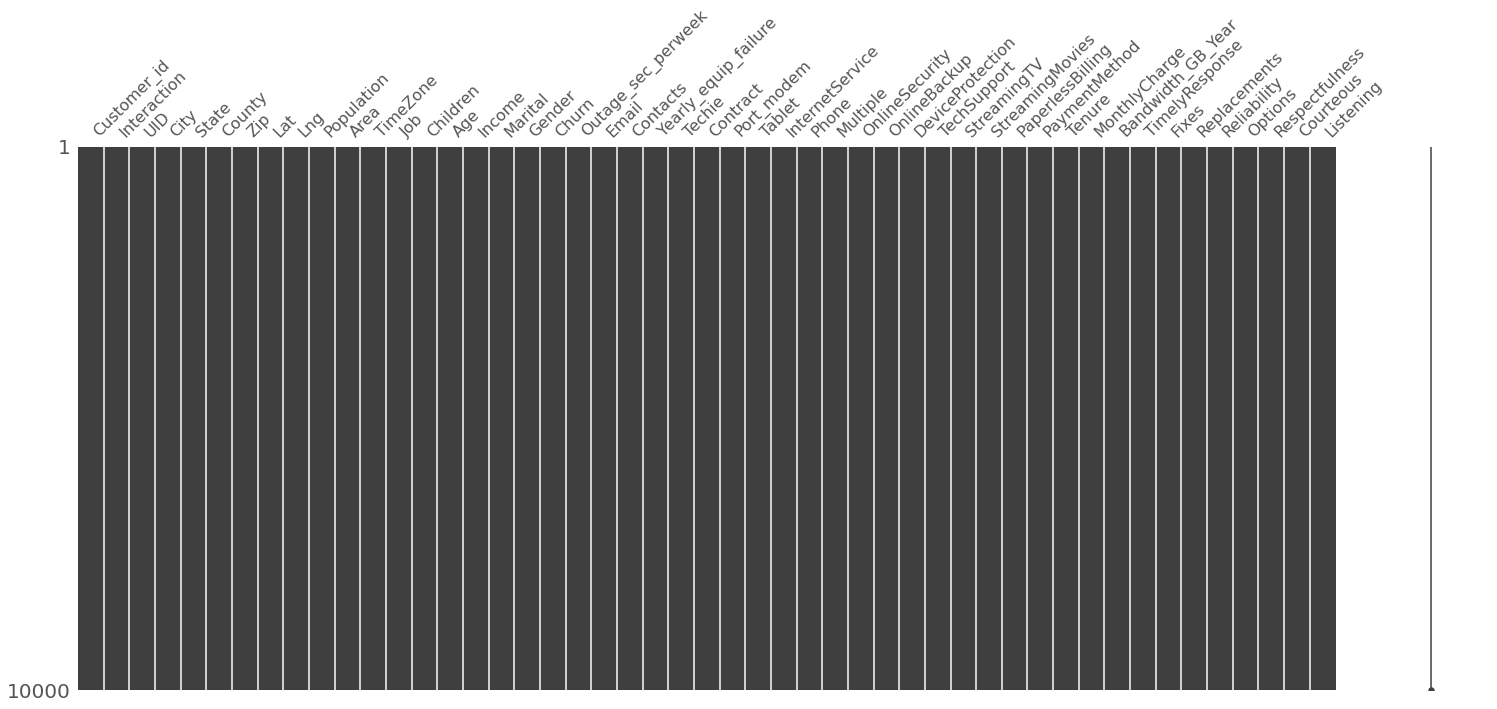

In [30]:
# Check for missing data & visualize missing values in dataset 

# Install appropriate library
!pip install missingno

# Importing the libraries
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(churn_df);
"""(GeeksForGeeks, p. 1)"""

In [31]:
# Encode binary categorical variables with dummies
churn_df['DummyGender'] = [1 if v == 'Male' else 0 for v in churn_df['Gender']]
churn_df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in churn_df['Churn']] ### If the customer left (churned) they get a '1'
churn_df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in churn_df['Techie']]
churn_df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in churn_df['Contract']]
churn_df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in churn_df['Port_modem']]
churn_df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in churn_df['Tablet']]
churn_df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in churn_df['InternetService']]
churn_df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in churn_df['Phone']]
churn_df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in churn_df['Multiple']]
churn_df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineSecurity']]
churn_df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineBackup']]
churn_df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in churn_df['DeviceProtection']]
churn_df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in churn_df['TechSupport']]
churn_df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingTV']]
churn_df['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingMovies']]
churn_df['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in churn_df['PaperlessBilling']]

In [32]:
# Drop original categorical features from dataframe
churn_df = churn_df.drop(columns=['Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                                  'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])

In [33]:
churn_df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,1,1,1,0,1,1,0,0,0,1
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,1,1,1,1,1,0,0,0,1,1
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,0,0,1,1,0,0,0,0,0,1
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,0,0,1,0,1,0,0,0,1,1
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,0,1,0,0,0,0,0,1,1,0


In [34]:
# Remove less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis
churn_df = churn_df.drop(columns=['Customer_id', 'Interaction', 'UID', 
                            'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
                            'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])
churn_df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,...,1,1,1,0,1,1,0,0,0,1
2,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,...,1,1,1,1,1,0,0,0,1,1
3,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,...,0,0,1,1,0,0,0,0,0,1
4,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,...,0,0,1,0,1,0,0,0,1,1
5,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,...,0,1,0,0,0,0,0,1,1,0


In [35]:
# Move DummyChurn to end of dataset to set as target
churn_df = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
        'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening',
       'DummyGender', 'DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling', 'DummyChurn',]]

churn_df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling,DummyChurn
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,...,1,1,0,1,1,0,0,0,1,0
2,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,...,1,1,1,1,0,0,0,1,1,1
3,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,...,0,1,1,0,0,0,0,0,1,0
4,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,...,0,1,0,1,0,0,0,1,1,0
5,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,...,1,0,0,0,0,0,1,1,0,1


In [36]:
# List features for analysis
features = (list(churn_df.columns[:-1]))
print('Features for analysis include: \n', features)

Features for analysis include: 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening', 'DummyGender', 'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone', 'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling']


In [37]:
# Extract Clean dataset
churn_df.to_csv('churn_prepared_dt.csv')

In [38]:
# Re-read fully numerical prepared dataset
churn_df = pd.read_csv('churn_prepared_dt.csv')

# Set predictor features & target variable
X = churn_df.drop('DummyChurn', axis=1).values
y = churn_df['DummyChurn'].values

In [39]:
# Import model, splitting method & metrics from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [40]:
# Set seed for reproducibility
SEED = 1

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [41]:
# Instantiate Decision Tree Regressor model 
dt = DecisionTreeRegressor(max_depth = 8,
                              min_samples_leaf = 0.1,
                              random_state = SEED)
# Fit dataframe to Decision Tree Regressor model
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Predict outcomes from test set
y_pred = dt.predict(X_test)

In [42]:
# Compute test set MSE
mse_dt = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_dt = mse_dt**(1/2)

# Print initial RMSE
print('Initial RMSE score Decison Tree Regressor model: {:.3f}'.format(rmse_dt))

Initial RMSE score Decison Tree Regressor model: 0.359


In [43]:
# Instantiae Random Random Forest Regressor model
rfr = RandomForestRegressor(n_estimators=500, random_state=1)

# Fit model to dataframe
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

In [44]:
# Create vectors of predictions
train_predictions = rfr.predict(X_train)
test_predictions = rfr.predict(X_test)

In [45]:
# Train/Test Errors
train_error = MAE(y_true=y_train, y_pred=train_predictions)
test_error = MAE(y_true=y_test, y_pred=test_predictions)

In [46]:
# Print the accuracy for seen and unseen data
print("Model error on seen data: {0:.2f}.".format(train_error))
print("Model error on unseen data: {0:.2f}.".format(test_error))

Model error on seen data: 0.07.
Model error on unseen data: 0.20.


In [47]:
# Print how import each column is to the model
for i, item in enumerate(rfr.feature_importances_):
    print('{0:s}: {1:.2f}'.format(churn_df.columns[i], item))

CaseOrder: 0.05
Children: 0.02
Age: 0.03
Income: 0.04
Outage_sec_perweek: 0.04
Email: 0.03
Contacts: 0.01
Yearly_equip_failure: 0.01
Tenure: 0.28
MonthlyCharge: 0.23
Bandwidth_GB_Year: 0.04
TimelyResponse: 0.01
Fixes: 0.01
Replacements: 0.01
Reliability: 0.01
Options: 0.01
Respectfulness: 0.01
Courteous: 0.01
Listening: 0.01
DummyGender: 0.00
DummyTechie: 0.01
DummyContract: 0.04
DummyPort_modem: 0.00
DummyTablet: 0.00
DummyInternetService: 0.03
DummyPhone: 0.00
DummyMultiple: 0.00
DummyOnlineSecurity: 0.00
DummyOnlineBackup: 0.00
DummyDeviceProtection: 0.00
DummyTechSupport: 0.00
DummyStreamingTV: 0.00
DummyPaperlessBilling: 0.00


In [48]:
# Import cross validation metrics
from sklearn.model_selection import cross_val_score

# Compute the coefficient of determination (R-squared)
scores = cross_val_score(rfr, X, y, scoring='r2')

In [49]:
# Print R-squared value
print('Cross validation R-squared values: ', scores)

Cross validation R-squared values:  [0.35182042 0.37141884 0.45388691 0.21454753 0.16200604]


In [50]:
# Print Mean Squared Error
print('With a manual calculation, the Mean Squared Error: {:.3f} '.format(sum(abs(y_test - y_pred)**2)/len(y_pred)))

# Or

from sklearn.metrics import mean_squared_error as MSE
print('Using scikit-lean, the Mean Squared Error: {:.3f}'.format(MSE(y_test, y_pred)))

With a manual calculation, the Mean Squared Error: 0.129 
Using scikit-lean, the Mean Squared Error: 0.129


In [51]:
# Calculate & print the Root Mean Squared Error
RMSE = MSE(y_test, y_pred)**(1/2)

# Print the Root Mean Squared Error
print('Root Mean Squared Error: {:.3f} '.format(RMSE))

Root Mean Squared Error: 0.359 


In [52]:
# Get parameters of Random Forest Regression model
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Import GridSearchCV for cross validation of model
from sklearn.model_selection import GridSearchCV

# Define grid of hyperparameters 
params_rfr = {'n_estimators': [300, 400, 500],
            'max_depth': [4, 6, 8],
            'min_samples_leaf': [0.1, 0.2],
            'max_features': ['log2', 'sqrt']}

# Re-intantiate Random Forest Regressor for cross validation
rfr = RandomForestRegressor()

# Instantiate GridSearch cross validation
rfr_cv = GridSearchCV(estimator=rfr,
                       param_grid=params_rfr,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1, 
                      n_jobs=-1)
# Fit model to 
rfr_cv.fit(X_train, y_train)

# Print best parameters
print('Best parameters for this Random Forest Regressor model: {}'.format(rfr_cv.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for this Random Forest Regressor model: {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}


In [54]:
# # Generate model best score
print('Best score for this Random Forest Regressor model: {:.3f}'.format(rfr_cv.best_score_))

Best score for this Random Forest Regressor model: -0.138
